# Interact Exercise 3

## Imports

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [4]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Using interact for animation with data

A [*soliton*](http://en.wikipedia.org/wiki/Soliton) is a constant velocity wave that maintains its shape as it propagates. They arise from non-linear wave equations, such has the [Korteweg–de Vries](http://en.wikipedia.org/wiki/Korteweg%E2%80%93de_Vries_equation) equation, which has the following analytical solution:

$$
\phi(x,t) = \frac{1}{2} c \mathrm{sech}^2 \left[ \frac{\sqrt{c}}{2} \left(x - ct - a \right) \right]
$$

The constant `c` is the velocity and the constant `a` is the initial location of the soliton.

Define `soliton(x, t, c, a)` function that computes the value of the soliton wave for the given arguments. Your function should work when the postion `x` *or* `t` are NumPy arrays, in which case it should return a NumPy array itself.

In [5]:
def soliton(x, t, c, a):
    """Return phi(x, t) for a soliton wave with constants c and a."""
    solt=0.5*c*(1/np.cosh(0.5*(c**.5)*(x-c*t-a))**2)
    return np.array(solt)

In [6]:
x=np.array([1,2,3,4,5])
t=np.array([6,7,8,9,10])
soliton(x,t,1,2)

array([ 0.00182044,  0.00182044,  0.00182044,  0.00182044,  0.00182044])

In [7]:
assert np.allclose(soliton(np.array([0]),0.0,1.0,0.0), np.array([0.5]))

To create an animation of a soliton propagating in time, we are going to precompute the soliton data and store it in a 2d array. To set this up, we create the following variables and arrays:

In [8]:
tmin = 0.0
tmax = 10.0
tpoints = 100
t = np.linspace(tmin, tmax, tpoints)

xmin = 0.0
xmax = 10.0
xpoints = 200
x = np.linspace(xmin, xmax, xpoints)

c = 1.0
a = 0.0

Compute a 2d NumPy array called `phi`:

* It should have a dtype of `float`.
* It should have a shape of `(xpoints, tpoints)`.
* `phi[i,j]` should contain the value $\phi(x[i],t[j])$.

In [9]:
phi=np.ndarray(shape=(xpoints,tpoints), dtype=float) #collaberated with Jack Porter
for i in x:
    for j in t:
        phi[i,j]=soliton(x[i],t[j],c,a)

phi

array([[  5.00000000e-001,   4.98726786e-001,   4.94932981e-001, ...,
          6.95266857e-310,   0.00000000e+000,   1.90979735e-313],
       [  4.99684484e-001,   4.99678081e-001,   4.97131791e-001, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  4.98739528e-001,   4.99999968e-001,   4.98713979e-001, ...,
          4.86959500e-318,   5.11216048e-317,   6.95266857e-310],
       ..., 
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000]])

In [10]:
assert phi.shape==(xpoints, tpoints)
assert phi.ndim==2
assert phi.dtype==np.dtype(float)
assert phi[0,0]==soliton(x[0],t[0],c,a)

Write a `plot_soliton_data(i)` function that plots the soliton wave $\phi(x, t[i])$. Customize your plot to make it effective and beautiful.

In [1]:
def plot_soliton_data(i=0):
    """Plot the soliton data at t[i] versus x."""
    plt.plot(soliton(x,t[i],c,a))

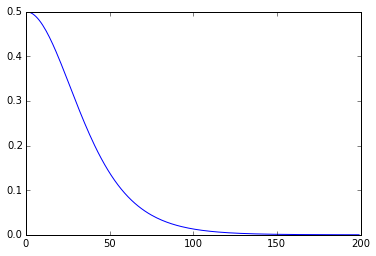

In [11]:
plot_soliton_data(0)

In [12]:
assert True # leave this for grading the plot_soliton_data function

Use `interact` to animate the `plot_soliton_data` function versus time.

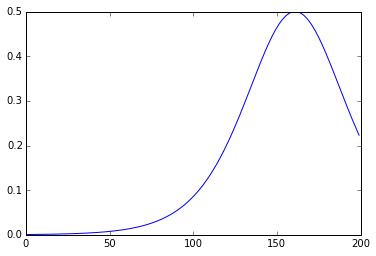

In [14]:
interact(plot_soliton_data,i=(0,100,10))

In [45]:
assert True # leave this for grading the interact with plot_soliton_data cell